Chargemet et preparation des donnees

In [34]:
from keras.datasets import reuters #bibliotheque pour importer notre dataset
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


num_words = 10000
maxlen = 200
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)



In [35]:
#affichage rapide des donnees
print(f"Nombre d'articles d'entraînement : {len(train_data)}")
print(f"Nombre d'articles de test : {len(test_data)}")
print(f"Exemple d'article encodé : {train_data[0][:10]}")

Nombre d'articles d'entraînement : 8982
Nombre d'articles de test : 2246
Exemple d'article encodé : [1, 2, 2, 8, 43, 10, 447, 5, 25, 207]


In [36]:
#comprendre les donnees
word_index = reuters.get_word_index()
def decode_article(encoded_article):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_article])

reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Article decode :")
print(decoded_review)




Article decode :
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [37]:
print(decode_article(train_data[0]))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [39]:
import json

# Depuis ton notebook, voici comment sauvegarder le dictionnaire word_index :

from keras.datasets import reuters

# Charger le word_index depuis Keras
dataset_word_index = reuters.get_word_index()

# Sauvegarder dans un fichier JSON
with open("word_index.json", "w") as f:
    json.dump(dataset_word_index, f)

print("word_index sauvegardé dans modele/word_index.json")

word_index sauvegardé dans modele/word_index.json


In [40]:
#pretraitement
x_train = pad_sequences(train_data, maxlen=maxlen)
x_test = pad_sequences(test_data, maxlen=maxlen)
y_train = to_categorical(train_labels, num_classes=46)
y_test = to_categorical(test_labels, num_classes=46)


Construction du modele

In [42]:
from keras import layers, Sequential

model = Sequential()
model.add(layers.Embedding(input_dim=num_words, output_dim=64, input_length=maxlen))
model.add(layers.LSTM(64))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Entrainements et evaluation

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))



Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.2850 - loss: 3.5457 - val_accuracy: 0.3540 - val_loss: 2.5097
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3487 - loss: 2.4916 - val_accuracy: 0.3550 - val_loss: 2.3039
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3764 - loss: 2.2893 - val_accuracy: 0.4630 - val_loss: 2.1234
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4444 - loss: 2.2068 - val_accuracy: 0.4860 - val_loss: 2.0548
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4582 - loss: 2.1271 - val_accuracy: 0.4850 - val_loss: 2.0579
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4664 - loss: 2.0974 - val_accuracy: 0.4940 - val_loss: 2.0081
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.4826 - loss: 2.0205 - val_accuracy: 0.4910 - val_loss: 2.0185
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4746 - loss: 2.0271 - val_accuracy: 0.4870 - val_loss:

In [ ]:
model.save("FOMENA_TSATSOP_VALDES_JOEL_CLASS.h5")

In [ ]:
#visualisation des performances
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

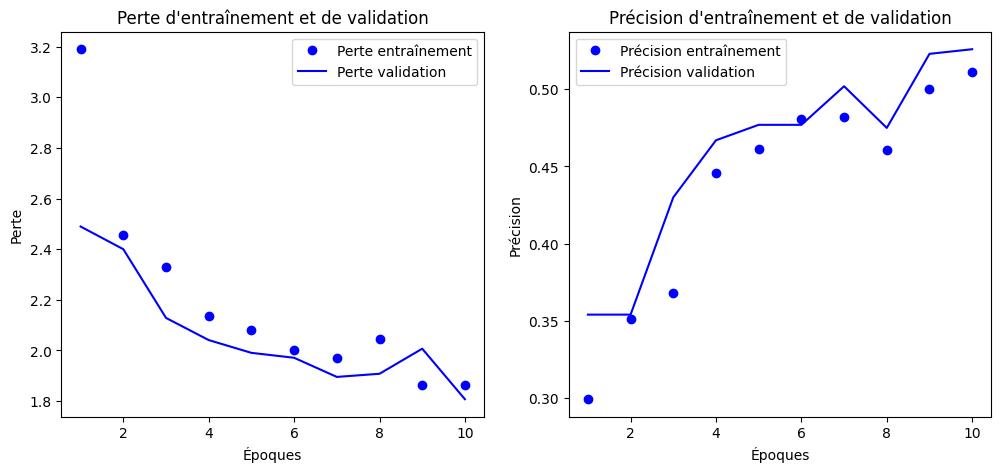

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss_values, 'b', label='Perte validation')
plt.title("Perte d'entraînement et de validation")
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title("Précision d'entraînement et de validation")
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

In [ ]:
plt.show()


In [ ]:
#evaluer sur le test
results = model.evaluate(x_test, y_test)
print(f"Test loss : {results[0]}")
print(f"Test accuracy : {results[1]}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.5331 - loss: 1.7740
Test loss : 1.7936333417892456
Test accuracy : 0.5342831611633301


prediction sur un nouvel article

In [ ]:
index = np.random.randint(0, len(x_test))
article = x_test[index].reshape(1, -1)
prediction = model.predict(article)
category_pred = np.argmax(prediction)
category_true = np.argmax(y_test[index])

print(f"Catégorie prédite : {category_pred}")
print(f"Catégorie réelle : {category_true}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Catégorie prédite : 3
Catégorie réelle : 3
